# Homework


### 1) Sliding coin

A coin slides off an inclined plane, angle of inclination 30 degrees, from a height of 50 cm. It arrives to the bottom of the inclined plane in 1 second.
 * a)  How many forces act on the coin during its motion? Draw a free-body diagram. (2p)
 * b)  Calculate the coefficient of friction between the coin and the table. (3p)
 
### 2) Coin on record player 

The (maximum of the) coefficient of static friction between a coin and the surface of a record player is 0.5. We place the coin on the record player, 30 cm from the center. The record player starts spinning. At what RPM will the coin slip? (3p)

### 3) Two blocks pushing each other

We push two blocks of wood on a slippery floor, coefficient of friction 0.1 - as in the problem 5.9 of Gewirtz, but with friction. What is the net force that the 8-kg block exerts on the 2-kg block? (2p) 

 
### 4) Python 

Consider the coin on the record player in Exercise 1.2 above. If the RPM is high enough, the coin will start to slip. Plot the trajectory of the coin, assuming the turntable is really really big (10 m radius) -- do this for 4 different RPM values, that are large enough. Neglect any rotation of the coin, just consider translational motion. 
Hint: To plot the trajectory, track the motion of the coin using Newton's 2nd law: divide time into many small intervals, and at the end of each interval calculate 1) the force vector, use it to 2) update the velocity vector, and 3) update the position vector.
Your code should produce the 4 plots, (top view of the motion), to a good enough precision.  


# Exercises to be solved in class:


## Summary of class: Newton's laws, free-body diagram (5 min)

Collect Newton's laws of motion, put them on the board 

Free-body diagram for an object sliding on an inclined plane. Put it on the board. (this is basically homework 1a), but that is OK)


## 5.2 from Gewirtz as a test question (3 min)

A 15-kilogram mass is sliding along a frictionless floor with an acceleration of 5 meters per second squared. What is the magnitude of the net force acting on the mass?

<font color='red'>(A)</font> 3 N \
<font color='blue'>(B)</font> 15 N \
<font color='green'>(C)</font> 20 N \
<font color='yellow'>(D)</font> 75 N 


## Free-body diagram for a coin sliding on a record player (10 min -- help for python homework)


## similar to 5.7 from Gewirtz as a computation problem (5 min)
With different numbers


## 5.8 from Gewirtz as a computation problem (5 min)
With different numbers




## Summary of class: How Newton's 2nd law prescribes motion (5 min)
Use a 1D example



# Write a short python code useful for python homework 

Do it in various steps, incrementally. 

A coin is sliding off an inclined plane, angle of inclination 30 degrees, from a height of $h=$50 cm. The coefficient of friction is $ \mu = 0.4$. Plot the displacement as a function of time. Do the plot twice: first, using the analytical solution, then, by tracking the motion using Newton's second law, dividing the time up into small intervals of $ dt $. If $ dt $ is small enough, this should be OK.   

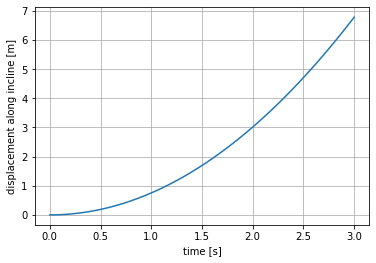

In [1]:
# 1 - I write this, kind of together with them (10 min)

import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin, sqrt

# data, using SI units:
h = 0.5
theta = 30/180*pi
mu = 0.4
g = 9.81

# analytical solution: 
a0 = g*(sin(theta) - mu*cos(theta))
t0 = np.linspace(0, 3, 1000)
s0 = a0/2*t0**2

plt.plot(t0, s0)
plt.grid()
plt.xlabel("time [s]")
plt.ylabel("displacement along incline [m]")
plt.show()

In [2]:
# 2 OK, but we only want to plot the motion until the object reaches
#  the bottom of the incline. How to do it? 

# I let them figure this out, then discuss the result:


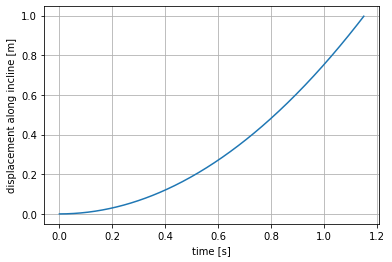

time to bottom of incline: 1.15 seconds


In [3]:
# Solution to 2:
#  Since we have an angle of 30 degrees, we know s_max is 1m.

s_max = h/sin(theta)
plt.plot(t0[s0<s_max], s0[s0<s_max])

plt.xlabel("time [s]")
plt.ylabel("displacement along incline [m]")
plt.grid()
plt.show()
print("time to bottom of incline: %.4g seconds"%(t0[s0<s_max][-1]))

We can read off the time needed for the coin to reach the bottom: roughly 1.2 seconds. 
We can also calculate this: 

$$ t = \sqrt{2s/a} = \sqrt{\frac{2h/\sin\theta}{g [\sin(\theta) - \mu \cos(\theta)]}} $$

# 1 Now for calculating the trajectory by stepping the time

What we are doing is called "integrating the equations of motion" using Euler's method. 

The main idea: from time $t$ to $t+dt$, the object 
1. moves because it has a velocity (need to update its position)
2. accelerates because it has an acceleration (need to update its velocity)
3. experiences maybe a new values of the forces (new position, new velocity) 
4. the sum of forces determines its acceleration (need to update acceleration)

### Outline of the algorithm:

1) Preparation: Initialize two empty list to collect the t and s values. You will use these lists to plot: `plot(t, s)`. Set the values of h, theta, mu, g.

2) Initial conditions: t, x, v, a should all be 0. 

3) *Loop* while the coin is still on the incline: 
* 0)    t = t + dt
* 1)    x = x + v dt
* 2)    a = sum of F / m
* 3)    v = v + a dt 
* 4)    append the t and x values to the lists t and s

4) Do the plot 


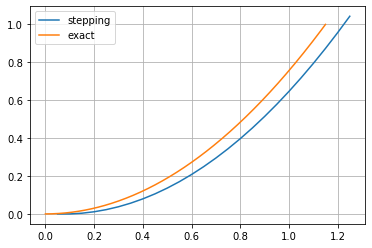

Total time: 1.25 seconds
Total time in theory: 1.1521 seconds


In [4]:
# 3 I let them work it out. 

# coin slipping on an inclined plane
h = 0.5
theta = 30/180*pi
mu = 0.4
g = 9.81
s_tot = h/sin(theta)
m = 0.005

# Choose the timestep dt as reasonably small (will check if small enough)  
dt = 0.05

#initial conditions:
s = 0
v = 0 
a = 0
t = 0
# python also allows you to write it in a more condensed way:
s, v, a, t = 0, 0, 0, 0

ss, tt = [], []

while s<s_tot:
    t_new = t + dt
    s_new = s + dt*v
    v_new = v + dt*a
    # Calculate the sum of forces, use it 
    #  for the new acceleration:
    a = (m*g*sin(theta)-mu*m*g*cos(theta)) / m
    t, s, v = t_new, s_new, v_new
    ss.append(s)
    tt.append(t)
    
plt.plot(tt, ss, label="stepping")
plt.plot(t0[s0<s_max], s0[s0<s_max], label="exact")
plt.legend()
plt.grid()
plt.show()
print("Total time: %.5g seconds"%tt[-1])
print("Total time in theory: %.5g seconds"%(np.sqrt(2*h/sin(theta) 
                    / (g * (sin(theta) - mu*cos(theta))))))

In [5]:
# 4) What we have looks good, but is a little off. 
# We should try to use smaller timesteps
#  put it in an outer loop, check 
#  with larger and smaller timesteps. 
#  Does it converge?

Total time in theory: 1.1521 seconds
Total time, dt=0.1:  1.4 seconds
Total time, dt=0.01:  1.17 seconds
Total time, dt=0.001:  1.154 seconds
Total time, dt=0.0001:  1.1523 seconds


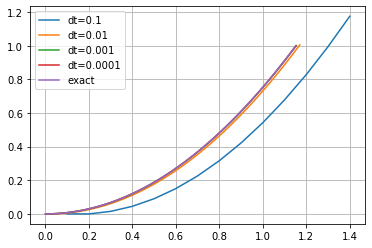

In [6]:
dt_vals = [0.1, 0.01, 0.001, 0.0001]
h = 0.5
theta = 30/180*pi
mu = 0.4
g = 9.81
s_tot = h/sin(theta)
m = 0.005
print("Total time in theory: %.5g seconds"%(sqrt(2*h/sin(theta) 
                    / (g * (sin(theta) - mu*cos(theta))))))

# Choose the timestep dt as reasonably small (will check if small enough)  

for dt in dt_vals:
    s, v, a, t = 0, 0, 0, 0
    ss, tt = [], []

    while s<s_tot:
        t_new = t + dt
        s_new = s + dt*v
        v_new = v + dt*a
        # Calculate the sum of forces, use it 
        #  for the new acceleration:
        a = (m*g*sin(theta)-mu*m*g*cos(theta)) / m
        t, s, v = t_new, s_new, v_new
        ss.append(s)
        tt.append(t)
        #t += dt
        #s += dt*v
        #a = (m*g*sin(theta)-mu*m*g*cos(theta)) / m
        #v += dt*a
    
    plt.plot(tt, ss, label="dt=%.2g"%dt)
    
    print("Total time, dt=%.2g:  %.5g seconds"%(dt, tt[-1]))
plt.plot(t0[s0<s_max], s0[s0<s_max], label="exact")
plt.legend()
plt.grid()
plt.show()